In [1]:
import requests
from pprint import pprint
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import linregress

In [2]:
# tip 2: print the type of the response
#type(response)

In [3]:
# tip 3: print the keys of a dictionary
#response.keys()

# Bank Asset Data

In [4]:
five_bank_asset_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CASSET%2CCHBAL%2CSC%2CFREPO%2CLNLSNET%2CLNRE%2CTRADE%2CBKPREM%2CORE%2CINTAN%2CAOA%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [5]:
bank_asset= requests.get(five_bank_asset_url).json()
pprint(bank_asset)

{'data': [{'data': {'AOA': 35604000,
                    'ASSET': 486967000,
                    'BKPREM': 644000,
                    'CERT': 33124,
                    'CHBAL': 184470000,
                    'FREPO': 36309000,
                    'ID': '33124_20221231',
                    'INTAN': 1855000,
                    'LNLSNET': 158254000,
                    'LNRE': 26310000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'ORE': 0,
                    'REPDTE': '20221231',
                    'SC': 29588000,
                    'TRADE': 40243000},
           'score': 0},
          {'data': {'AOA': 103329000,
                    'ASSET': 2418508000,
                    'BKPREM': 19397000,
                    'CERT': 3510,
                    'CHBAL': 213093000,
                    'FREPO': 31316000,
                    'ID': '3510_20221231',
                    'INTAN': 58665000,
                    'LNLSNET': 1029699000,
                    'LNRE'

In [6]:
# tip 2: print the type of the response
type(bank_asset)

dict

In [7]:
# tip 3: print the keys of a dictionary
bank_asset.keys()

dict_keys(['meta', 'data', 'totals'])

In [8]:
#Create a list to hold the data of each financial asset
Combined_assetdata=[]

#loop through the data details of the dictionary 
for asset in bank_asset['data']:
        Date = asset['data']["REPDTE"]
        Total_asset=asset['data']["ASSET"]
        Bank_Certificate=asset['data']["CERT"]
        Bank_Name=asset['data']["NAME"]
        Cash_Balances_due_Depo_In=asset['data']["CHBAL"]
        Securities=asset['data']["SC"]
        Federal_Funds_Sold_Reverse_repurchase=asset['data']["FREPO"]
        Net_Loans_Leases=asset['data']["LNLSNET"]
        Real_Estate_loan=asset['data']["LNRE"]
        Bankpremises_fixedasset=asset['data']["BKPREM"]
        Other_real_estate_owned=asset['data']["ORE"]
        Goodwill_otherIntangibles=asset['data']["INTAN"]
        All_Other_Assets=asset['data']["AOA"]
        
        
        Combined_assetdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Asset": Total_asset,
                                  "Cash and Balances due from Depository Institutions": Cash_Balances_due_Depo_In,
                                  "Securities": Securities,
                                   "Federal Funds Sold & Reverse Repurchase Agreements":Federal_Funds_Sold_Reverse_repurchase,
                                  "Net Loans Lease":Net_Loans_Leases,
                                  "All Real Estate Loans":Real_Estate_loan,
                                   "Bank Premises and Fixed Assets":Bankpremises_fixedasset,
                                  "Other Real Estate Owned":Other_real_estate_owned,
                                   "Goodwill and Other Intangibles":Goodwill_otherIntangibles,
                                  "All Other Asset":All_Other_Assets
                                  })
     

In [9]:
new_data = pd.DataFrame(Combined_assetdata)
#new_data

new_bank_asset= new_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_asset

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset
0,20120331,CITIBANK NATIONAL ASSN,7213,1312764000,192631000,209584000,74156000,565001000,197617000,4553000,389000,19512000,86168000
1,20120331,GOLDMAN SACHS BANK USA,33124,101927000,43851000,0,7961000,12117000,2205000,0,0,4000,5355000
2,20120331,BANK OF AMERICA NA,3510,1448261695,137505274,324118960,15253172,710134088,422874873,10444346,3067901,65894202,114813943
3,20120331,JPMORGAN CHASE BANK NA,628,1842569000,170383000,369913000,237338000,584565000,277236000,10362000,2009000,36856000,104571000
4,20120331,FIRST REPUBLIC BANK,59017,29718987,1429286,2892298,12973,23409315,21164636,121002,4348,171356,1664216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,20221231,JPMORGAN CHASE BANK NA,628,3201942000,568546000,631123000,313102000,1124240000,383040000,23378000,211000,48600000,205257000
260,20221231,FIRST REPUBLIC BANK,59017,212638872,4283201,31718821,0,166083667,138507527,1718019,0,229623,8510288
261,20221231,WELLS FARGO BANK NA,3511,1717531000,156379000,401571000,73884000,906316000,403691000,10516000,207000,33036000,72220000
262,20221231,BANK OF AMERICA NA,3510,2418508000,213093000,824974000,31316000,1029699000,325508000,19397000,296000,58665000,103329000


##Part 1: a) Create stack stacked bar chart, b) liquidity ration, 3)Pie chart analysis of current asset vs. non-current
 

In [13]:
#Total assets=  Cash and balances due from depository institutions + securities+ Net Loans and leases + Other Real Estates Owned+ Goodwill and other Intangibles
#Current asset = Cash and balances due from depository institutions + securities
#create dataframe of each bank of the current asset vs. total asset
new_bank_asset["Current Asset"]=new_bank_asset["Cash and Balances due from Depository Institutions"]+new_bank_asset["Securities"]
new_bank_asset["Curret Asset Ratio"]=new_bank_asset["Current Asset"]/new_bank_asset["Total Asset"]
new_bank_asset.tail(6)

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset,Current Asset,Curret Asset Ratio
258,20221231,CITIBANK NATIONAL ASSN,7213,1766752000,330199000,485347000,92279000,625986000,167633000,12071000,11000,13854000,87473000,815546000,0.461608
259,20221231,JPMORGAN CHASE BANK NA,628,3201942000,568546000,631123000,313102000,1124240000,383040000,23378000,211000,48600000,205257000,1199669000,0.374669
260,20221231,FIRST REPUBLIC BANK,59017,212638872,4283201,31718821,0,166083667,138507527,1718019,0,229623,8510288,36002022,0.169311
261,20221231,WELLS FARGO BANK NA,3511,1717531000,156379000,401571000,73884000,906316000,403691000,10516000,207000,33036000,72220000,557950000,0.324856
262,20221231,BANK OF AMERICA NA,3510,2418508000,213093000,824974000,31316000,1029699000,325508000,19397000,296000,58665000,103329000,1038067000,0.429218
263,20221231,GOLDMAN SACHS BANK USA,33124,486967000,184470000,29588000,36309000,158254000,26310000,644000,0,1855000,35604000,214058000,0.439574


In [ ]:
#create a stack bar chart with the compositon of the asset.
#Total Asset= Cash and Balances due from Depository Institutions+Securities+Net Loans Lease+Federal funds sold & revenue repurchase agreements +Trading account assets + Banking premises and fixed assets+ Other real estate owned+ Goodwill and other intangibles+All other assets

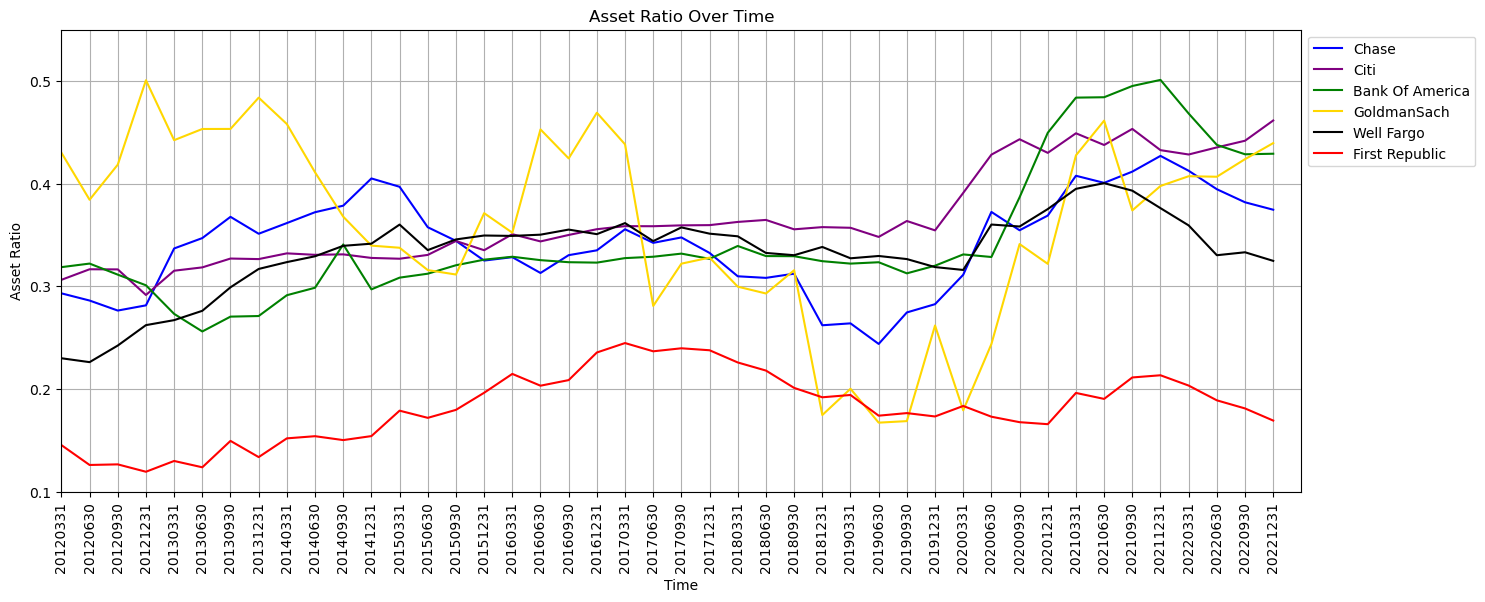

In [14]:
#Plot current asset ratio over time for the six banks, time=np.arange(1,len(new_bank_asset["Reporting Date"].unique())+1,1)
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_asset.loc[(new_bank_asset["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Curret Asset Ratio"], color="blue", label="Chase")
Citi,=plt.plot(x_axis,new_bank_asset.loc[(new_bank_asset["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Curret Asset Ratio"], color="purple", label="Citi")
BOA, = plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="BANK OF AMERICA NA"),"Curret Asset Ratio"], color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Curret Asset Ratio"], color="gold", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="WELLS FARGO BANK NA"),"Curret Asset Ratio"], color="black", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="FIRST REPUBLIC BANK"),"Curret Asset Ratio"], color="red", label="First Republic")
plt.xticks(tick_locations, new_bank_asset["Reporting Date"].unique(), rotation="vertical")
# Add labels to X and Y axes :: Add title
plt.title("Asset Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Asset Ratio")

# Add limits to x axis and y-axis
plt.xlim(0,44)
plt.ylim(0.1,0.55)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

In [15]:
#Create a pie chart of the Chase's avg current asset and other assets


# Bank Liabilities

In [11]:
bank_liabilites_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CDEP%2CDEPDOM%2CDEPFOR%2CFREPP%2CTRADEL%2COTHBRF%2CALLOTHL%2CEQTOT%2CNAME%2CLIABEQ%2CLIAB&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [12]:
Bank_liabilites= requests.get(bank_liabilites_url).json()
pprint(Bank_liabilites)

{'data': [{'data': {'ALLOTHL': 28682000,
                    'CERT': 33124,
                    'DEP': 362009000,
                    'DEPDOM': 352005000,
                    'DEPFOR': 10004000,
                    'EQTOT': 48341000,
                    'FREPP': 8406000,
                    'ID': '33124_20221231',
                    'LIAB': 438626000,
                    'LIABEQ': 486967000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'OTHBRF': 6168000,
                    'REPDTE': '20221231',
                    'TRADEL': 29090000},
           'score': 0},
          {'data': {'ALLOTHL': 42417000,
                    'CERT': 3510,
                    'DEP': 2042255000,
                    'DEPDOM': 1929333000,
                    'DEPFOR': 112922000,
                    'EQTOT': 225449000,
                    'FREPP': 47475000,
                    'ID': '3510_20221231',
                    'LIAB': 2193059000,
                    'LIABEQ': 2418508000,
   

          {'data': {'ALLOTHL': 26857000,
                    'CERT': 3510,
                    'DEP': 1213119000,
                    'DEPDOM': 1143477000,
                    'DEPFOR': 69642000,
                    'EQTOT': 202370000,
                    'FREPP': 33953000,
                    'ID': '3510_20141231',
                    'LIAB': 1371723000,
                    'LIABEQ': 1574093000,
                    'NAME': 'BANK OF AMERICA NA',
                    'OTHBRF': 55780000,
                    'REPDTE': '20141231',
                    'TRADEL': 35692000},
           'score': 0},
          {'data': {'ALLOTHL': 32601000,
                    'CERT': 3511,
                    'DEP': 1213156000,
                    'DEPDOM': 1062122000,
                    'DEPFOR': 151034000,
                    'EQTOT': 145411000,
                    'FREPP': 13509000,
                    'ID': '3511_20141231',
                    'LIAB': 1387373000,
                    'LIABEQ': 1532784000,
  

In [13]:
#Create a list to hold the data of each financial asset
Combined_liabilitesdata=[]

for liab in Bank_liabilites['data']:
        Date = liab['data']["REPDTE"]
        Bank_Certificate=liab['data']["CERT"]
        Bank_Name=liab['data']["NAME"]
        Total_liabilites_and_capitals=liab['data']["LIABEQ"]
        Total_liabilities=liab['data']["LIAB"]
        Total_Deposit=liab['data']["DEP"]
        Deposits_in_Domestic_Offices=liab['data']["DEPDOM"]
        Deposits_in_Foreign_Offices=liab['data']["DEPFOR"]
        All_other_liabilities=liab['data']["ALLOTHL"]
        Total_Equity_Capital=liab['data']["EQTOT"]
        Federal_funds_purchased_repurchase=liab['data']["FREPP"]
        Trading_Liabilities=liab['data']["TRADEL"]
        Other_borrowed_funds=liab['data']["OTHBRF"]
        
        
        
        
        
        Combined_liabilitesdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Liabilites and capitals": Total_liabilites_and_capitals,
                                   "Total Liabilites":Total_liabilities,
                                   "Total Deposit": Total_Deposit,
                                   "Total Domestic Deposit":Deposits_in_Domestic_Offices,
                                   "Total Foreign Deposit":Deposits_in_Foreign_Offices,
                                   "All other Liabilities":All_other_liabilities,
                                   "Total EquityCapital":Total_Equity_Capital,
                                   "Federal funds purchased and repurchase agreements":Federal_funds_purchased_repurchase,
                                   "Trading Liabilites": Trading_Liabilities,
                                   "Other borrowed funds": Other_borrowed_funds
                                  })
     

In [14]:
new_liabilites_data= pd.DataFrame(Combined_liabilitesdata)
#new_data

new_bank_liabilites= new_liabilites_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_liabilites

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total EquityCapital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds
0,2012-03-31,CITIBANK NATIONAL ASSN,7213,1312764000,1156070000,916847000,360111000,556736000.0,51623000,156694000,27572000,53049000,106979000
1,2012-03-31,GOLDMAN SACHS BANK USA,33124,101927000,82154000,48688000,48688000,0.0,7149000,19773000,13509000,12240000,568000
2,2012-03-31,BANK OF AMERICA NA,3510,1448261695,1271951505,1088270375,975418440,112851935.0,28338643,176310190,51498025,33206749,45307189
3,2012-03-31,JPMORGAN CHASE BANK NA,628,1842569000,1708723000,1188468000,842471000,345997000.0,82296000,133846000,183733000,130548000,94603000
4,2012-03-31,FIRST REPUBLIC BANK,59017,29718987,26855514,23254961,23254961,NaN,412483,2863473,0,13008,3110030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022-12-31,JPMORGAN CHASE BANK NA,628,3201942000,2898270000,2440722000,2014513000,426209000.0,157039000,303672000,85902000,115971000,98375000
260,2022-12-31,FIRST REPUBLIC BANK,59017,212638872,195192945,176436706,176436706,0.0,3401373,17445927,0,75775,14499860
261,2022-12-31,WELLS FARGO BANK NA,3511,1717531000,1556061000,1420842000,1399274000,21568000.0,29253000,161470000,13461000,22398000,59201000
262,2022-12-31,BANK OF AMERICA NA,3510,2418508000,2193059000,2042255000,1929333000,112922000.0,42417000,225449000,47475000,34692000,24735000


# Bank Performace 

In [15]:
bank_performance_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CROE%2CROA%2CNIMY%2CEEFFR%2CLNLSNTV%2CLNLSDEPR%2CIDLNCORR%2CDEPDASTR%2CIDT1RWAJR%2CRBC1AAJ%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [16]:
bank_performace=requests.get(bank_performance_url).json()
pprint(bank_performace)

{'data': [{'data': {'CERT': 33124,
                    'DEPDASTR': 72.29,
                    'EEFFR': 44.870458009144144,
                    'ID': '33124_20221231',
                    'IDLNCORR': 60.46067385681593,
                    'IDT1RWAJR': 13.155423628441074,
                    'LNLSDEPR': 43.71548773649274,
                    'LNLSNTV': 32.5,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'NIMY': 1.5958658383954245,
                    'RBC1AAJ': 9.38574416759499,
                    'REPDTE': '20221231',
                    'ROA': 0.6796610900453495,
                    'ROE': 7.26},
           'score': 0},
          {'data': {'CERT': 3510,
                    'DEPDASTR': 79.77,
                    'EEFFR': 56.22849724115547,
                    'ID': '3510_20221231',
                    'IDLNCORR': 53.872526502044096,
                    'IDT1RWAJR': 13.068460231147547,
                    'LNLSDEPR': 50.41970762710827,
                    'LN

In [17]:
combined_performance=[]

for perf in bank_performace['data']:
        Date = perf['data']["REPDTE"]
        Bank_Certificate=perf['data']["CERT"]
        Bank_Name=perf['data']["NAME"]
        Net_Interest_Margin=perf['data']["NIMY"]
        Return_on_Assets=perf['data']["ROA"]
        Return_on_Equity=perf['data']["ROE"]
        Efficiency_Ratio=perf['data']["EEFFR"]
        Net_Loans_Leases_to_Assets=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_Deposits=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_CoreDeposit=perf['data']["IDLNCORR"]
        Domestic_Deposits_to_Total_Assets=perf['data']["DEPDASTR"]
        Tier_1_Risk_Based_Capital_Ratio=perf['data']["IDT1RWAJR"]
        
        
        combined_performance.append({"Reporting Date": Date,
                                     "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                    "Net Interest Margin": Net_Interest_Margin,
                                    "Return on Assets": Return_on_Assets,
                                    "Return on Equity": Return_on_Assets,
                                    "Efficiency Ratio": Efficiency_Ratio,
                                    "Net Loans Leases to Assets": Net_Loans_Leases_to_Assets,
                                    "Net Loans Leases to Deposits": Net_Loans_Leases_to_Deposits,
                                    "Net Loans Leases to CoreDeposit": Net_Loans_Leases_to_CoreDeposit,
                                    "Domestic Deposits to Total Assets":Domestic_Deposits_to_Total_Assets,
                                    "Tier 1 Risk Based Capital Ratio": Tier_1_Risk_Based_Capital_Ratio
                                       })
     

In [16]:
new_perf_data= pd.DataFrame(combined_performance)

new_bank_perfor= new_perf_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_perfor

NameError: name 'combined_performance' is not defined